## Titanic - Kaggle excercise

## 1. Importando librerias y datos

In [12]:
# Importando librerias 
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
# Leyendo datos
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')
gender_df = pd.read_csv('./gender_submission.csv')

In [14]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Analisis exploratorio (EDA)

In [15]:
# ¿Cuales son las columnas del Dataframe?
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
# ¿Que tamaño tienen los datos?
train_df.shape

(891, 12)

In [17]:
# ¿Hay valores nulos en los datos?
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
# ¿Como se distribuyen las variables numericas?
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
# ¿Como se comportan las variables categoricas?
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


### 2.1 EDA: Estudio de la variable target

In [20]:
train_df.groupby(['Survived']).count()['PassengerId']

Survived
0    549
1    342
Name: PassengerId, dtype: int64

In [21]:
# Target vs sex 
train_df.groupby(['Survived', 'Sex']).count()['PassengerId']

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: PassengerId, dtype: int64

In [24]:
grouped_sex = train_df.groupby(['Survived', 'Sex']).count()['PassengerId']
grouped_sex.unstack(level=0)

Survived,0,1
Sex,,
female,81,233
male,468,109


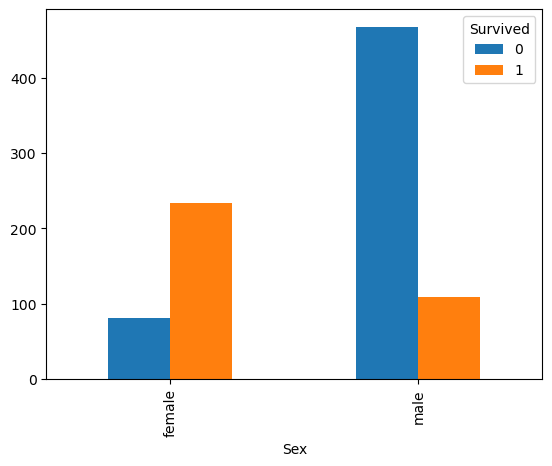

In [25]:
grouped_sex.unstack(level=0).plot.bar()
plt.show()

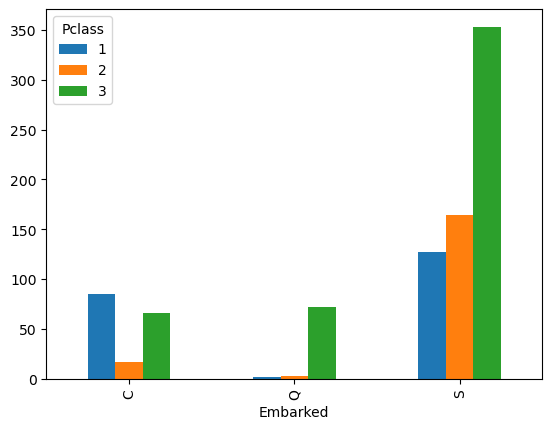

In [27]:
# Embarked vs pclass
train_df.groupby(['Pclass', 'Embarked']).count()['PassengerId'].unstack(level=0).plot.bar()
plt.show()

## 3. Procesamiento de los datos

Empezamos seleccionando las variables que queremos trabajar que serían:
* Survived (target)
* Sex
* Age
* Pclass

In [28]:
train_df[['Survived', 'Sex', 'Age', 'Pclass']].head()

,Survived,Sex,Age,Pclass
0,0,male,22.0,3
1,1,female,38.0,1
2,1,female,26.0,3
3,1,female,35.0,1
4,0,male,35.0,3


#### Estudiando los datos nulos

In [29]:
train_df[['Survived', 'Sex', 'Age', 'Pclass']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   Pclass    891 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


Tenemos que mejorar:
* Datos faltantes en Age `train['Age'].isna()`
* La varibale Sex aparece como `object` y lo necesitamos en un formato `int` o `float`, es decir, numérico.

In [32]:
# Observar como se distribuyen los nulos en edad
(
    train_df[train_df['Age'].isna()]
        .groupby(['Sex', 'Pclass'])
        .count()['PassengerId']
        .unstack(level=0)
)

Sex,female,male
Pclass,,
1,9,21
2,2,9
3,42,94


In [33]:
(
    train_df[train_df['Age'].isna()]
        .groupby(['SibSp', 'Parch'])
        .count()['PassengerId']
        .unstack(level=0)
)

SibSp,0,1,2,3,8
Parch,,,,,
0,133.0,21.0,3.0,NaN,NaN
1,1.0,3.0,NaN,4.0,NaN
2,3.0,2.0,NaN,NaN,7.0


De arriba se puede deducir que era gente que viajaba mayormente sola y la mayoria era de 3era clase. <br>

Esto nos da la idea de que se puede crear una varibale que indique si la persona viajaba sola o acompañada. <br>

Se creara más adelante.

In [34]:
# Calcular la mediana de Age para imputar
train_df['Age'].median()

28.0

In [35]:
# Imputar valor para rellenar los nulos
train_df['Age'] = train_df['Age'].fillna(28.0)
train_df[['Survived', 'Sex', 'Age', 'Pclass']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   Pclass    891 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


Ya no se tienen nulos. Falta resolver lo de cambiar Sex de object a numerico.

In [36]:
# Map para label encoding
train_df['Sex'] = train_df['Sex'].map({'female': 1, 'male': 0}).astype(int)

Ahora tenemos la tabla preprocesada lista

In [37]:
train_df[['Survived', 'Sex', 'Age', 'Pclass']].head()

,Survived,Sex,Age,Pclass
0,0,0,22.0,3
1,1,1,38.0,1
2,1,1,26.0,3
3,1,1,35.0,1
4,0,0,35.0,3


### 3.1 Crear nuevas variables

In [38]:
# Crear nueva variable tipo flag "solo"
train_df['FlagSolo'] = np.where(
    (train_df['SibSp'] == 0) & (train_df['Parch'] == 0), 1, 0,
)

In [39]:
grouped_flag = train_df.groupby(['Survived', 'FlagSolo']).count()['PassengerId']
grouped_flag

Survived  FlagSolo
0         0           175
          1           374
1         0           179
          1           163
Name: PassengerId, dtype: int64

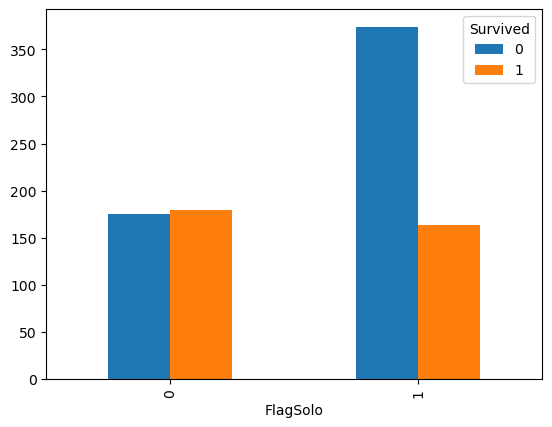

In [40]:
(
    grouped_flag.unstack(level=0).plot.bar()
)
plt.show()

In [41]:
train_df[['Survived', 'Sex', 'Age', 'Pclass', 'FlagSolo']].head()

,Survived,Sex,Age,Pclass,FlagSolo
0,0,0,22.0,3,0
1,1,1,38.0,1,0
2,1,1,26.0,3,1
3,1,1,35.0,1,0
4,0,0,35.0,3,1


Estos ya serian los datos con los que vamos a hacer modelos.

In [42]:
# Variable dependiente
Y_train = train_df['Survived']

# Preprocesamiento de variables independientes
features = ['Sex', 'Age', 'Pclass', 'FlagSolo']
X_train = train_df[features]

print(Y_train.shape, X_train.shape)

(891,) (891, 4)


## 4. Modelos

Modelos elegidos:
* Regresion Logistica
* Arboles de Decision

In [43]:
# Entreanando modelo de Regresion Logistica
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

LogisticRegression()

In [44]:
# Entrenando modelo de Arboles de Decision
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier()

## 5. Evaluación

Aqui vamos a hacer una matriz de confusion y evaluar que tan bueno es cada modelo.

In [58]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def conf_mat_acc(modelo, X, Y):
    cm = confusion_matrix(Y, modelo.predict(X),)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,)
    cm_display.plot(cmap=plt.cm.Blues,)

    true_pred = cm[0,0] + cm[1,1]
    total_data = np.sum(cm)
    accuracy = true_pred/total_data
    print(f'Accuracy= {accuracy:.2f}')

    plt.show()

Accuracy= 0.79


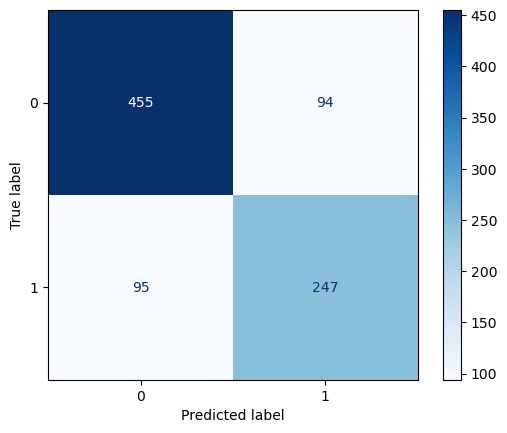

In [61]:
conf_mat_acc(logreg, X_train, Y_train)

Accuracy= 0.89


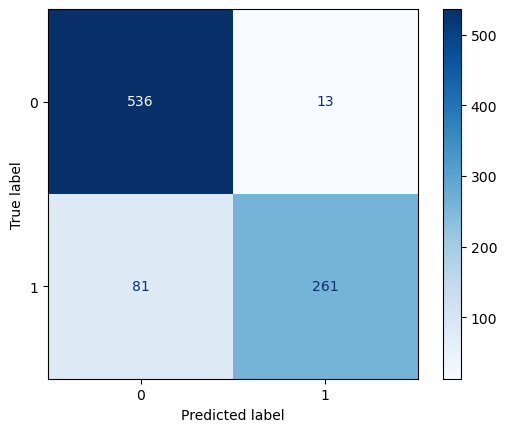

In [62]:
conf_mat_acc(decision_tree, X_train, Y_train)